In [209]:
import IPython.display as ipd
import sympy as sy

x, y, z, d = sy.symbols('x y z d')
sy.init_printing()

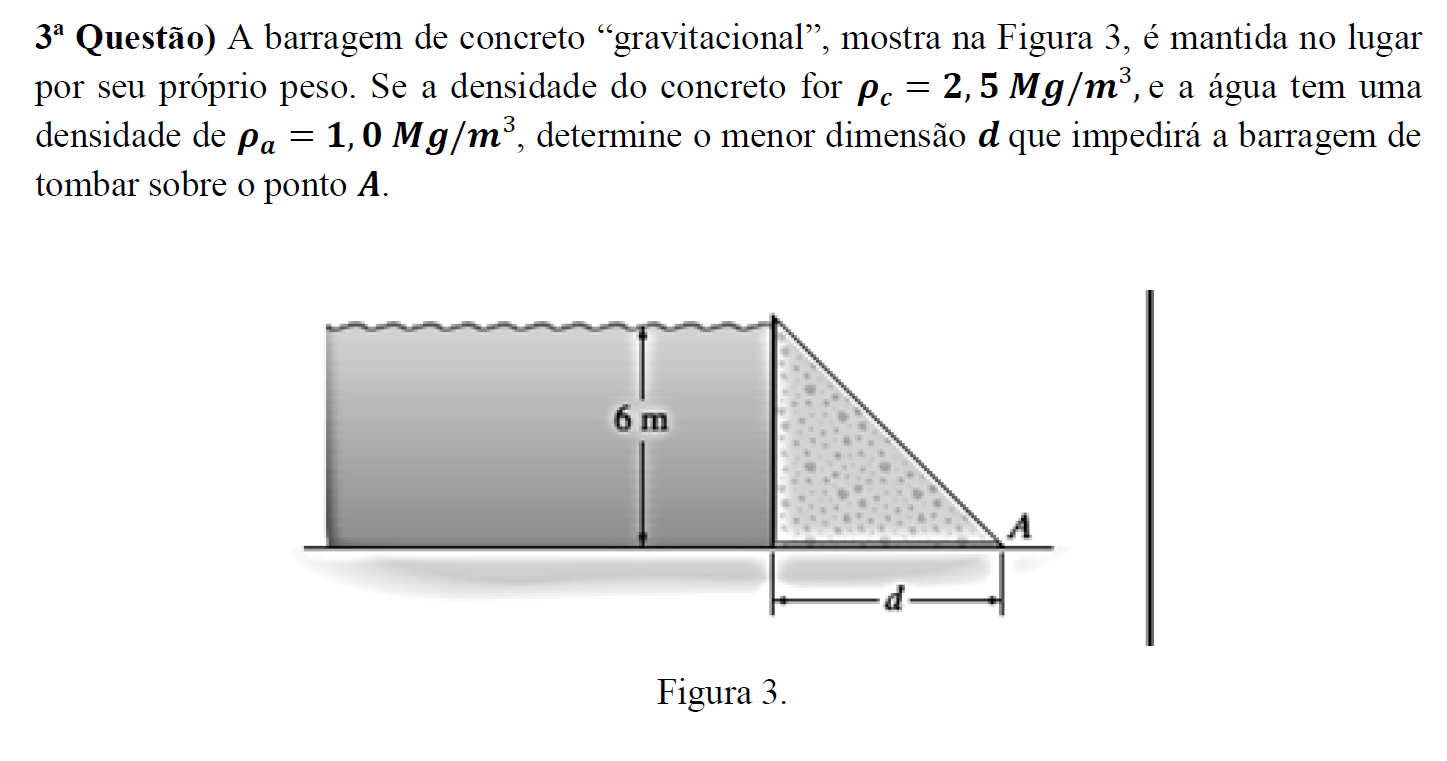

In [210]:
ipd.Image(filename='L5Q3.png')

### Dados necessários:

In [211]:
rho_concreto = 2.5e3 # [kg/m³]
rho_agua = 1e3 # [kg/m³]
H = 6 # [m]
g = 9.81 # [m/s²]

Objetivos:
Dimensionar a base 'd', mínima da barragem

nota:
0<h<(H=6)

Cálculo do carregamento sobre a barragem:

In [212]:
b = 1 # largura da barragem
w = rho_agua * g * H * b
print('carregamento sobre a barragem W: {:.3e} N/m'.format(w))

carregamento sobre a barragem W: 5.886e+04 N/m


Cálculo do esforço cortante:

In [213]:
Fr = sy.integrate(rho_agua * g * z * b, (z, 0, H))
print('Esforço Cortante: {:.3e} N'.format(Fr))

Esforço Cortante: 1.766e+5 N


Agora calculamos o ponto de ação da força resultante, ou seja, o centroide do volume sob o carregamento

(integral do momento de inércia em relação ao eixo Z vezes o peso específico)

In [214]:
z = rho_agua * g * b * sy.integrate(z ** 2,(z, 0, 6)) / Fr
z_barra = z
print('Altura da resultante em relação a base: {:.1f} m'.format(z))

Altura da resultante em relação a base: 4.0 m


O peso da barragem deve contrabalancear o momento gerado pelo carregamento da água, dessa forma, temos:
1. A relação de carregamento da barragem
2. A parametrização da variação da base em relação à altura da base

In [215]:
p1 = (0, 0) # (z, y)
p2 = (6, d)
# equação da reta
z = 6 / d * y
z

Criando a variável peso específico do concreto (pe_concreto)

In [216]:
pe_concreto = rho_concreto * g * b
pe_concreto

y varia de 0 a d, logo integramos nesse intervalo

In [217]:
w_resultante = pe_concreto * sy.integrate(z, (y, 0, d))
print('Carregamento ao longo da barragem: {} N'.format(w_resultante))

Carregamento ao longo da barragem: 73575.0*d N


Cálculo do ponto de atuação da força resultante da barragem:

In [218]:
momento_y = sy.integrate(pe_concreto * y * z, (y, 0, d))
momento_y

Cálculo do centroide em relação ao eixo y:

In [219]:
y_barra = momento_y / w_resultante
y_barra

Etapa final para calcular a dimensão d:
Estabelecer a equação de equilíbrio de momentos entre a barragem e a massa de água, então temos:

In [220]:
eq_momentos = sy.Eq(w_resultante * y_barra - Fr*(H-z_barra), 0)
eq_momentos

In [221]:
d_solucoes = sy.solve(eq_momentos, d)
d_solucoes

In [224]:
print('A dimensão mínima da barragem é {:.3f} m'.format(d_solucoes[1]))

A dimensão mínima da barragem é 2.683 m
